Date Created: 11/18/20
## Goal of Notebook: General Phage Analysis
For this notebook I want to understand the sample of sequenced phages in the phagesDB dataset. This is important because we have an unequal characteristics among the phages.

In [9]:
import requests 
import pandas as pd
from random import sample 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns                                                             
import sys 
from networkx.algorithms import bipartite


In [10]:
df_phages = pd.read_csv("data/phage_metadata.csv")
df_phages.head()

,phage,temperate,cluster,subcluster,morphotype,host genus,host species,genome length,is annotated,is phamerated,gcpercent
0,20ES,True,A,A2,SIPHO,Mycobacterium,smegmatis,53124.0,False,True,63.4
1,244,True,E,NaN,SIPHO,Mycobacterium,smegmatis,74483.0,True,True,63.4
2,32HC,True,Z,NaN,SIPHO,Mycobacterium,smegmatis,50781.0,False,True,65.7
3,39HC,False,B,B6,SIPHO,Mycobacterium,smegmatis,71565.0,False,True,70.0
4,40AC,True,A,A17,SIPHO,Mycobacterium,smegmatis,53396.0,False,True,63.3


In [11]:
df_annotated_phages = df_phages[df_phages["is annotated"]==True]
df_annotated_phages.head()

,phage,temperate,cluster,subcluster,morphotype,host genus,host species,genome length,is annotated,is phamerated,gcpercent
1,244,True,E,NaN,SIPHO,Mycobacterium,smegmatis,74483.0,True,True,63.4
6,Aaronocolus,True,BD,BD1,NaN,Streptomyces,griseus,49562.0,True,True,66.2
8,AbbeyMikolon,True,BL,NaN,SIPHO,Streptomyces,lividans,42551.0,True,True,66.8
11,ABCat,True,E,NaN,SIPHO,Mycobacterium,smegmatis,76131.0,True,True,63.0
12,Abdiel,True,A,A4,SIPHO,Mycobacterium,smegmatis,51381.0,True,True,63.9


In [29]:
df_phages["phage"].nunique()

3501

In [33]:
df_phages[df_phages["cluster"]=="A"].nunique()

phage            661
temperate          1
cluster            1
subcluster        20
morphotype         1
host genus         2
host species       6
genome length    547
is annotated       2
is phamerated      1
gcpercent         46
dtype: int64

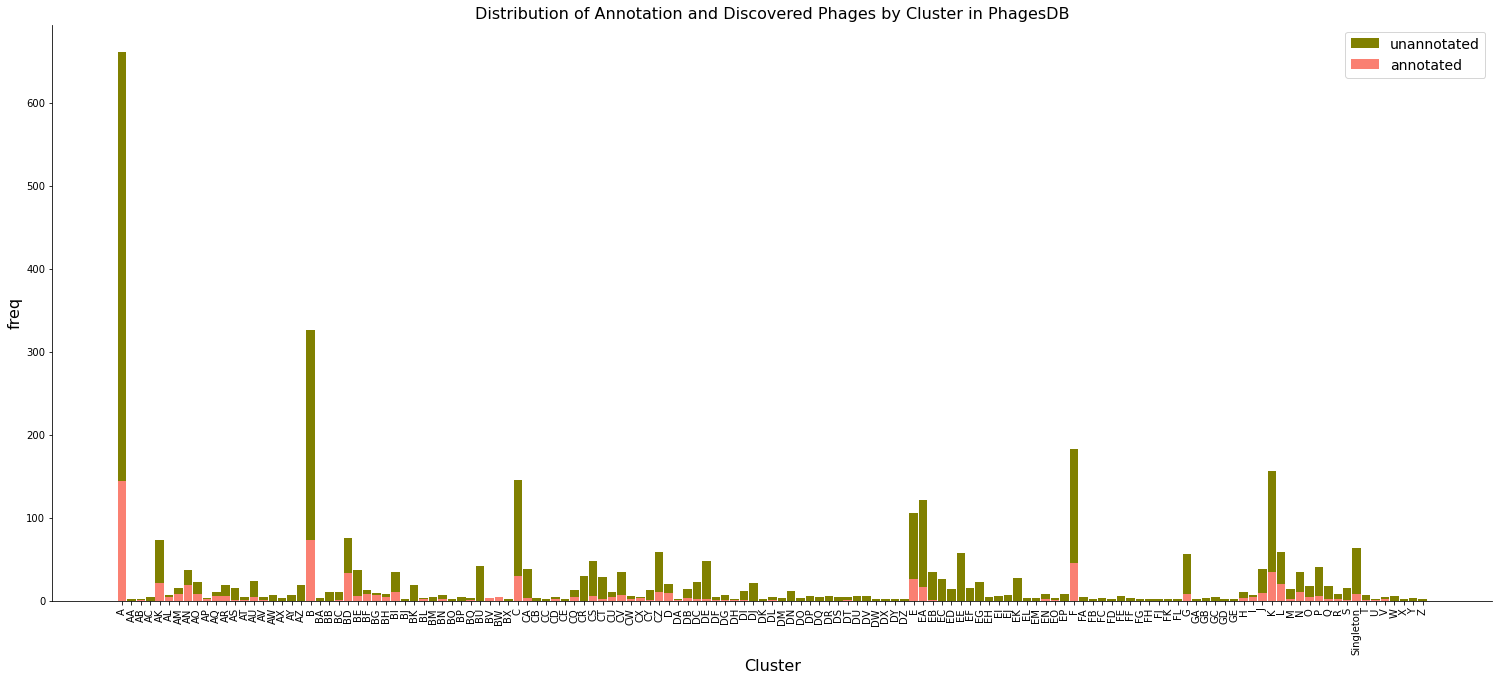

In [12]:
annotated_clusters = list(df_annotated_phages["cluster"].values)
all_clusters = list(df_phages["cluster"].values)

unique_clusters = np.sort([x for x in df_phages["cluster"].unique() if str(x) != 'nan'])


fig = plt.figure(figsize = (20,8))
ax = fig.add_axes([0,0,1,1])

#annotated

cluster_counts = [all_clusters.count(i) for i in unique_clusters]
ax.bar(unique_clusters, cluster_counts, color ="olive", label = "unannotated", width = 0.9)

# total 
cluster_counts = [annotated_clusters.count(i) for i in unique_clusters]
ax.bar(unique_clusters, cluster_counts, color ="salmon", alpha = 1, label = "annotated", width = 0.9)
plt.xticks(rotation='vertical', fontsize = 10)
plt.xlabel("Cluster", fontsize = 16)
plt.ylabel("freq", fontsize = 16)
plt.title("Distribution of Annotation and Discovered Phages by Cluster in PhagesDB", fontsize = 16)
plt.legend(fontsize = 14)
sns.despine()
plt.show()

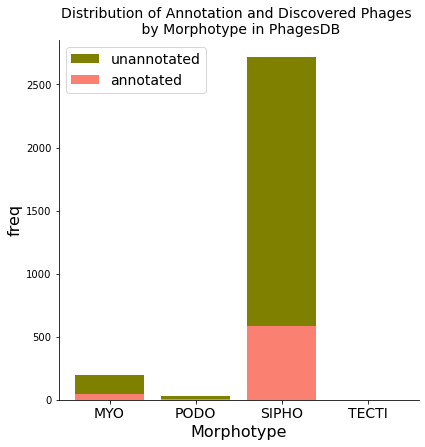

In [13]:
annotated_morphotypes = list(df_annotated_phages["morphotype"].values)
all_morphotypes = list(df_phages["morphotype"].values)

unique_morphotypes = np.sort([x for x in df_phages["morphotype"].unique() if str(x) != 'nan'])

fig = plt.figure(figsize = (5,5))
ax = fig.add_axes([0,0,1,1])

#annotated

morphotype_counts = [all_morphotypes .count(i) for i in unique_morphotypes]
ax.bar(unique_morphotypes, morphotype_counts, color ="olive", label = "unannotated", width = 0.8)

# total 
morphotype_counts = [annotated_morphotypes.count(i) for i in unique_morphotypes]
ax.bar(unique_morphotypes, morphotype_counts, color ="salmon", alpha = 1, label = "annotated", width = 0.8)

plt.xticks( fontsize = 14)
plt.xlabel("Morphotype", fontsize = 16)
plt.ylabel("freq", fontsize = 16)
plt.title("Distribution of Annotation and Discovered Phages \n by Morphotype in PhagesDB", fontsize = 14)
plt.legend(fontsize = 14)
sns.despine()

plt.show()

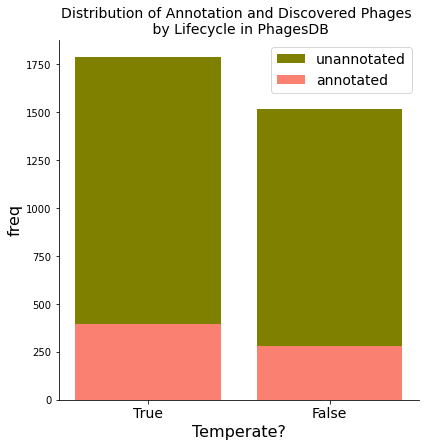

In [15]:
annotated_morphotypes = list(df_annotated_phages["temperate"].values)
all_morphotypes = list(df_phages["temperate"].values)

unique_morphotypes = ['True', 'False']

fig = plt.figure(figsize = (5,5))
ax = fig.add_axes([0,0,1,1])

#annotated

morphotype_counts = [all_morphotypes .count(i) for i in unique_morphotypes]
ax.bar(unique_morphotypes, morphotype_counts, color ="olive", label = "unannotated", width = 0.8)

# total 
morphotype_counts = [annotated_morphotypes.count(i) for i in unique_morphotypes]
ax.bar(unique_morphotypes, morphotype_counts, color ="salmon", alpha = 1, label = "annotated", width = 0.8)

plt.xticks( fontsize = 14)
plt.xlabel("Temperate?", fontsize = 16)
plt.ylabel("freq", fontsize = 16)
plt.title("Distribution of Annotation and Discovered Phages \n by Lifecycle in PhagesDB", fontsize = 14)
plt.legend(fontsize = 14)
sns.despine()

plt.show()

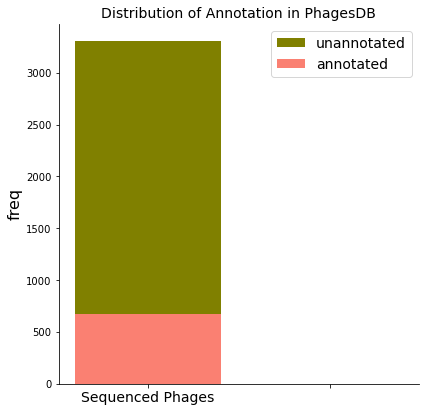

In [27]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_axes([0,0,1,1])

#annotated

morphotype_counts = [all_morphotypes .count(i) for i in unique_morphotypes]
ax.bar(["Sequenced Phages"," "], [sum(morphotype_counts),0], color ="olive", label = "unannotated", width = 0.8)

# total 
morphotype_counts = [annotated_morphotypes.count(i) for i in unique_morphotypes]
ax.bar(["Sequenced Phages"," "], [sum(morphotype_counts),1], color ="salmon", alpha = 1, label = "annotated", width = 0.8)

plt.xticks( fontsize = 14)
plt.ylabel("freq", fontsize = 16)
plt.xlabel("\n", fontsize = 16)
plt.title("Distribution of Annotation in PhagesDB", fontsize = 14)
plt.legend(fontsize = 14)
sns.despine()

plt.show()